In [2]:
# Set notebook to display figures inline and set dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os


In [3]:
# Save file paths
city_data_path = os.path.join(".","Resources","city_data.csv")
ride_data_path = os.path.join(".","Resources","ride_data.csv")

# Read csv data files into a data frame
city_data_df = pd.read_csv(city_data_path)
ride_data_df = pd.read_csv(ride_data_path)

In [4]:
# Check city_data_df for missing entries
col_counts = city_data_df.count()
print(col_counts)
city_data_df

# Check again using isnull method
null_count = city_data_df.isnull().sum()
print(null_count)

# Get the data types for each column in city_data_df
city_data_df.dtypes

# Get the unique city count using unique method on the city column
len(city_data_df["type"].unique())

# Get the number of data points that are "type" Urban
sum(city_data_df["type"] == "Urban")
sum(city_data_df["type"] == "Suburban")

city            120
driver_count    120
type            120
dtype: int64
city            0
driver_count    0
type            0
dtype: int64


36

In [5]:
# Check ride_data_df for missing entries
col_counts = ride_data_df.count()
print(col_counts)
ride_data_df

# Check again using isnull method
null_count = ride_data_df.isnull().sum()
print(null_count)

# Get the data types for each column in ride_data_df
ride_data_df.dtypes

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64
city       0
date       0
fare       0
ride_id    0
dtype: int64


city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [6]:
# Combine data frames 
pyber_data_complete_df = pd.merge(ride_data_df,city_data_df, how="left",on=["city","city"])

# Create data frames for each type of city
urban_cities_df = pyber_data_complete_df[pyber_data_complete_df["type"] == "Urban"]
suburban_cities_df = pyber_data_complete_df[pyber_data_complete_df["type"] == "Suburban"]
rural_cities_df = pyber_data_complete_df[pyber_data_complete_df["type"] == "Rural"]

rural_cities_df.head()


,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [7]:
# Get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]

# Get the number of rides for surburban cities
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

# Get the number of rides for rural cities
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [8]:
# Get the average fare for each urban, surburban, and rural city
avg_urban_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
avg_suburban_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
avg_rural_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
avg_rural_fare


city
Bradshawfurt         40.064000
Garzaport            24.123333
Harringtonfort       33.470000
Jessicaport          36.013333
Lake Jamie           34.358333
Lake Latoyabury      26.061818
Michaelberg          34.997500
New Ryantown         43.278333
Newtonview           36.745000
North Holly          29.130000
North Jaime          30.802500
Penaborough          35.246000
Randallchester       29.742000
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64

In [9]:
# Get the number of drivers per city for each city type
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]



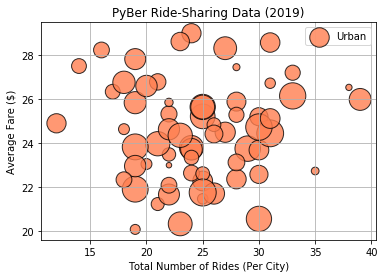

In [10]:
# Build a scatter plot for urban cities
plt.scatter(urban_ride_count,
            avg_urban_fare,
            s=urban_driver_count*10,
            c='coral',
            edgecolor='black',
            alpha=0.8, label='Urban')
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

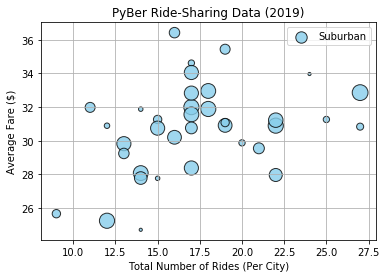

In [11]:
# Build a scatter plot for suburban cities
plt.scatter(suburban_ride_count,
            avg_suburban_fare,
            s=suburban_driver_count*10,
            c='skyblue',
            edgecolor='black',
            alpha=0.8, label='Suburban')
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

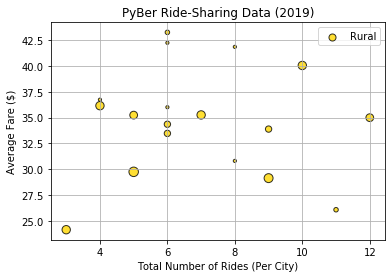

In [12]:
# Build a scatter plot for rural cities
plt.scatter(rural_ride_count,
            avg_rural_fare,
            s=rural_driver_count*10,
            c='gold',
            edgecolor='black',
            alpha=0.8, label='Rural')
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

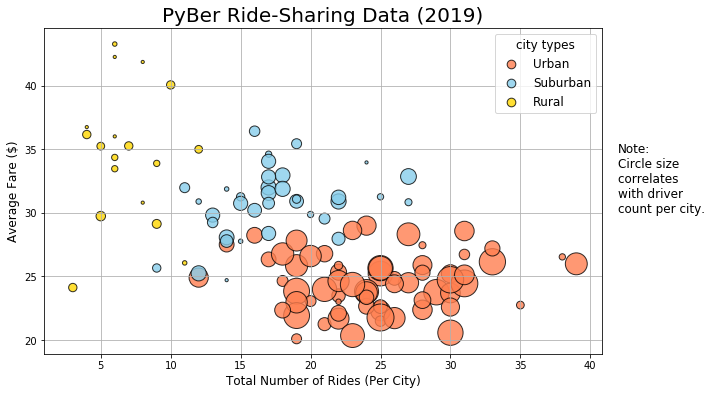

In [16]:
# Build a scatter plot with all cities
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,
            avg_urban_fare,
            s=urban_driver_count*10,
            c='coral',
            edgecolor='black',linewidths=1,
            alpha=0.8, label='Urban')

plt.scatter(suburban_ride_count,
            avg_suburban_fare,
            s=suburban_driver_count*10,
            c='skyblue',
            edgecolor='black',linewidths=1,
            alpha=0.8, label='Suburban')

plt.scatter(rural_ride_count,
            avg_rural_fare,
            s=rural_driver_count*10,
            c='gold',
            edgecolor='black',linewidths=1,
            alpha=0.8, label='Rural')

# Incorporate other figure details
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Customize legend and add note
lgnd = plt.legend(fontsize='12', mode='Expanded', 
                  scatterpoints=1, loc='best', title='city types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Display text note about circle size
plt.text(42,30,'Note:\nCircle size \ncorrelates \nwith driver \ncount per city.', fontsize='12')

# Save the figure
plt.savefig('Analysis\Fig1.png')

plt.show()

